In [7]:
!pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 871.5 kB/s eta 0:00:45
   ---------------------------------------- 0.4/38.6 MB 2.7 MB/s eta 0:00:15
    --------------------------------------- 0.8/38.6 MB 4.4 MB/s eta 0:00:09
   - -------------------------------------- 1.4/38.6 MB 5.8 MB/s eta 0:00:07
   - -------------------------------------- 1.9/38.6 MB 6.8 MB/s eta 0:00:06
   -- ------------------------------------- 2.3/38.6 MB 7.1 MB/s eta 0:00:06
   -- ------------------------------------- 2.5/38.6 MB 7.2 MB/s eta 0:00:05
   -- ------------------------------------- 2.5/38.6 MB 7.2 MB/s eta 0:00:05
   --- --------------

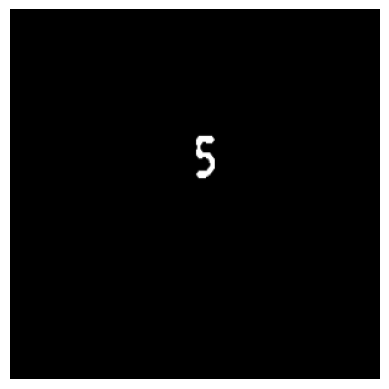

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(300, 300)):
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
    
    # Apply adaptive thresholding to get binary image
    binary_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    
    # Apply morphological operations (dilation and erosion) to remove noise
    kernel = np.ones((3, 3), np.uint8)
    dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
    final_image = cv2.erode(dilated_image, kernel, iterations=1)
    
    # Apply median filtering to remove small white areas
    filtered_image = cv2.medianBlur(final_image, 5)
    
    # Resize the image
    resized_image = cv2.resize(filtered_image, target_size)
    
    return resized_image

# Path to the input image
input_image_path = r"C:\Users\sumit\Pictures\Screenshots\Screenshot 2024-04-19 162745.png"

# Preprocess the image
preprocessed_image = preprocess_image(input_image_path)

# Display the preprocessed image
plt.imshow(preprocessed_image, cmap='gray')
plt.axis('off')  # Turn off axis numbers
plt.show()


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the images to match the input shape expected by the model
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.8818 - loss: 0.3695 - val_accuracy: 0.9763 - val_loss: 0.0695
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9838 - loss: 0.0506 - val_accuracy: 0.9884 - val_loss: 0.0347
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9891 - loss: 0.0343 - val_accuracy: 0.9894 - val_loss: 0.0325
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9918 - loss: 0.0257 - val_accuracy: 0.9904 - val_loss: 0.0288
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9939 - loss: 0.0191 - val_accuracy: 0.9841 - val_loss: 0.0550
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9818 - loss: 0.0657
Test accuracy: 0.9840999841690063


In [4]:
model.save(r"C:\Users\sumit\Downloads\model.keras")

In [7]:
image_path = r"C:\Users\sumit\Pictures\Screenshots\Screenshot 2024-04-19 162745.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (28, 28))
image = image.astype('float32') / 255.0
image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=-1)

# Make a prediction
prediction = model.predict(image)
predicted_class = np.argmax(prediction)

print(f'Predicted class: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted class: 8


In [33]:
image

array([[[[0.7764706 ],
         [0.78039217],
         [0.78431374],
         [0.8       ],
         [0.7882353 ],
         [0.79607844],
         [0.7921569 ],
         [0.78039217],
         [0.79607844],
         [0.78431374],
         [0.7921569 ],
         [0.7882353 ],
         [0.8       ],
         [0.7921569 ],
         [0.79607844],
         [0.76862746],
         [0.7529412 ],
         [0.7254902 ],
         [0.7137255 ],
         [0.70980394],
         [0.69803923],
         [0.68235296],
         [0.67058825],
         [0.6901961 ],
         [0.69803923],
         [0.6784314 ],
         [0.6862745 ],
         [0.68235296]],

        [[0.75686276],
         [0.78039217],
         [0.7764706 ],
         [0.78431374],
         [0.78039217],
         [0.7882353 ],
         [0.7882353 ],
         [0.7882353 ],
         [0.7921569 ],
         [0.8       ],
         [0.8039216 ],
         [0.8039216 ],
         [0.7882353 ],
         [0.79607844],
         [0.78039217],
         